## Uploading the Data

In [71]:
from google.colab import files 

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

## Data Reading

In [72]:
import pandas as pd

solar =pd.read_csv('SolarEclipse.csv')

solar.info()
solar['Eclipse Type'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7124 entries, 0 to 7123
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               7124 non-null   int64  
 1   Month              7124 non-null   int64  
 2   Day                7124 non-null   int64  
 3   Hour               7124 non-null   int64  
 4   Minute             7124 non-null   int64  
 5   Second             7124 non-null   int64  
 6   Delta T (s)        7124 non-null   int64  
 7   Lunation Number    7124 non-null   int64  
 8   Saros Number       7124 non-null   int64  
 9   Eclipse Type       7124 non-null   int64  
 10  Gamma              7124 non-null   float64
 11  Eclipse Magnitude  7124 non-null   float64
 12  Latitude           7124 non-null   float64
 13  Longitude          7124 non-null   float64
 14  Sun Altitude       7124 non-null   int64  
 15  Sun Azimuth        7124 non-null   int64  
dtypes: float64(4), int64(12)

11    2303
1     2280
14    1845
7      260
13     100
12      97
4       45
17      45
3       25
5       23
2       20
8       18
6       17
15      11
9       11
18       8
10       7
19       7
16       2
Name: Eclipse Type, dtype: int64

## Train Test Split

In [73]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(solar, test_size = 0.3, random_state = 42)

print(f'Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}')

Rows in train set: 4986
Rows in test set: 2138


## Stratified Shuffle Split

In [74]:
from sklearn.model_selection import StratifiedShuffleSplit

splitData = StratifiedShuffleSplit(n_splits = 1, test_size = 0.3, random_state = 42)

for train_indices, test_indices in splitData.split(solar, solar['Eclipse Type']):
    strat_train_set = solar.loc[train_indices]
    strat_test_set = solar.loc[test_indices]

print(f'Stratified Train Set: {len(strat_train_set)}\nStratified Test Set: {len(strat_test_set)}')

Stratified Train Set: 4986
Stratified Test Set: 2138


## Correlations

In [75]:
correlation_matrix = solar.corr()

sn = correlation_matrix['Saros Number'].sort_values(ascending = False)
et = correlation_matrix['Eclipse Type'].sort_values(ascending = False)
gm = correlation_matrix['Gamma'].sort_values(ascending = False)

print(f'Correlation with Saros Number:\n{sn}')
print(f'\nCorrelation with Eclipse Type:\n{et}')
print(f'\nCorrelation with Gamma:\n{gm}')

Correlation with Saros Number:
Saros Number         1.000000
Lunation Number      0.914345
Year                 0.914329
Month                0.053060
Longitude            0.017189
Hour                 0.012548
Day                  0.007022
Minute               0.003640
Gamma               -0.002139
Latitude            -0.002318
Eclipse Type        -0.002707
Sun Altitude        -0.004258
Second              -0.005290
Eclipse Magnitude   -0.015705
Sun Azimuth         -0.065317
Delta T (s)         -0.551924
Name: Saros Number, dtype: float64

Correlation with Eclipse Type:
Eclipse Type         1.000000
Latitude             0.037949
Minute               0.009764
Gamma                0.007152
Longitude            0.006085
Delta T (s)          0.002520
Year                -0.001813
Lunation Number     -0.001816
Saros Number        -0.002707
Hour                -0.002991
Second              -0.004156
Day                 -0.004908
Month               -0.006154
Sun Azimuth         -0.014424
Ec

## Train Features & Train Labels

In [76]:
solar_features = strat_train_set.drop(['Saros Number', 'Eclipse Type', 'Gamma'], axis = 1)
solar_labels = strat_train_set[['Saros Number', 'Eclipse Type', 'Gamma']].copy()

## Selecting a Desired Model

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# solar_model = LinearRegression()
# solar_model = DecisionTreeRegressor()
solar_model = RandomForestRegressor()

solar_model.fit(solar_features, solar_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [78]:
some_features = solar_features.iloc[20:25]
some_labels = solar_labels.iloc[20:25]

In [79]:
solar_model.predict(some_features)

array([[ 89.03    ,  13.9     ,  -0.275285],
       [ 85.7     ,  14.      ,   0.637223],
       [ 59.12    ,   2.75    ,  -0.747288],
       [ 81.07    ,   1.96    ,   0.678782],
       [125.29    ,   1.1     ,  -0.276005]])

In [80]:
some_labels

,Saros Number,Eclipse Type,Gamma
866,90,14,-0.3207
1537,84,14,0.7270
25,57,1,-0.9838
479,89,1,0.9702
3464,126,1,-0.3391


## Cross Validation

In [81]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(solar_model, solar_features, solar_labels, scoring = 'neg_mean_squared_error', cv = 10)
rmse_scores = np.sqrt(-scores)

In [82]:
def score_values(scores):
    print('Scores: ', scores)
    print('Mean: ', scores.mean())
    print('Standard Deviation: ', scores.std())

score_values(rmse_scores)

Scores:  [5.12058609 5.26703268 5.09376545 4.90899409 5.27253647 4.96997853
 5.1521239  5.05034633 5.06908002 4.78843284]
Mean:  5.069287641006288
Standard Deviation:  0.14328303496585088


## Test Features & Test Labels

In [83]:
solar_test_features = strat_test_set.drop(['Saros Number', 'Eclipse Type', 'Gamma'], axis = 1)
solar_test_labels = strat_test_set[['Saros Number', 'Eclipse Type', 'Gamma']].copy()

## Final Predictions Based Upon Test Data

In [84]:
final_predictions = solar_model.predict(solar_test_features)

In [85]:
final_predictions

array([[ 83.13     ,  13.55     ,  -0.194347 ],
       [106.07     ,   1.52     ,  -0.646352 ],
       [118.02     ,  13.76     ,  -0.410147 ],
       ...,
       [ 69.04     ,   4.15     ,   0.538539 ],
       [110.58     ,  14.04     ,   0.5963935],
       [163.77     ,  11.3      ,   0.982556 ]])

In [86]:
solar_test_labels

,Saros Number,Eclipse Type,Gamma
437,84,14,-0.4248
2461,114,1,-0.8726
3733,117,14,-0.5846
1688,111,11,1.3352
4901,147,1,0.6583
...,...,...,...
3426,98,13,1.5125
3122,122,1,-0.5150
523,66,1,0.9884
2277,115,14,0.9105


In [87]:
from sklearn.metrics import mean_squared_error

final_mse = mean_squared_error(solar_test_labels, final_predictions)
final_rmse = np.sqrt(final_mse)

final_rmse

4.821402860004934

## Predictions Based Upon User Inputs

In [88]:
year = 2020
month = 6
day = 21
hours = 6
minutes = 41
seconds = 15
delta = 72
lunation_number = 253
eclipse_magnitude = 0.994
sun_altitude = 83
latitude = 30.5
longitude = 79.7
sun_azimuth = 174

features = np.array([[
            year, month, day, hours, minutes, seconds, delta, 
            lunation_number, eclipse_magnitude, sun_altitude, latitude, longitude, sun_azimuth
    ]])

custom_value_predictions = solar_model.predict(features)

print(f'Saros Number: {int(custom_value_predictions[0][0])}')
print(f'Eclipse Type: {int(custom_value_predictions[0][1])}')
print(f'Gamma: {round(custom_value_predictions[0][2], 4)}')

Saros Number: 135
Eclipse Type: 2
Gamma: 0.1683


## Data Visualization

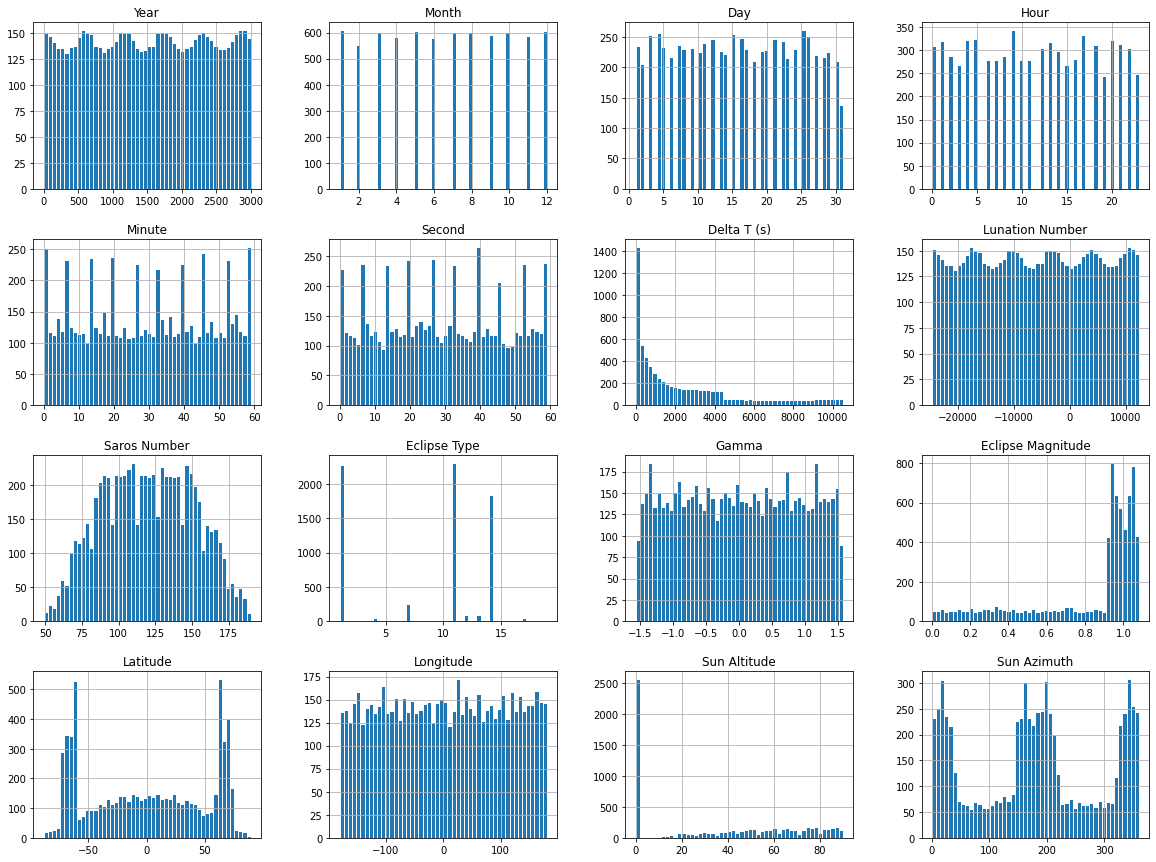

In [89]:
%matplotlib inline

import matplotlib.pyplot as plt

solar.hist(bins = 50, figsize = (20, 15), ec = 'white')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7dba865dd8>,
      dtype=object)

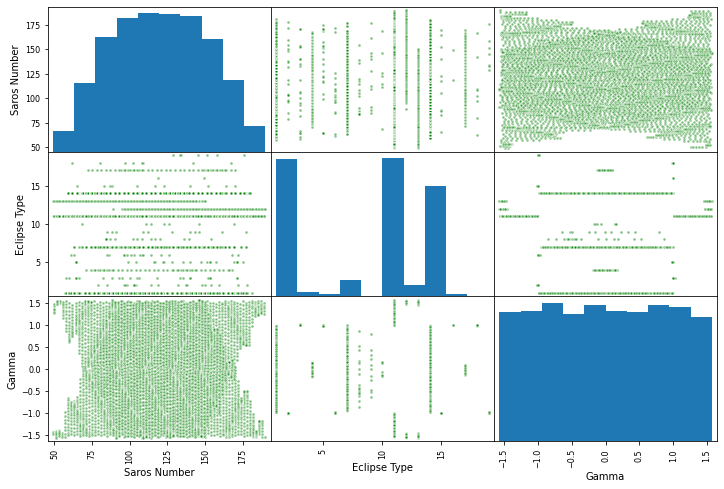

In [90]:
from pandas.plotting import scatter_matrix

attributes = ['Saros Number', 'Eclipse Type', 'Gamma']
scatter_matrix(solar[attributes], figsize = (12, 8), color = 'green',ec = 'white')

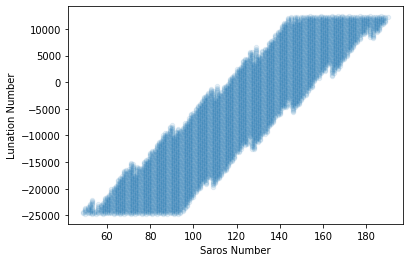

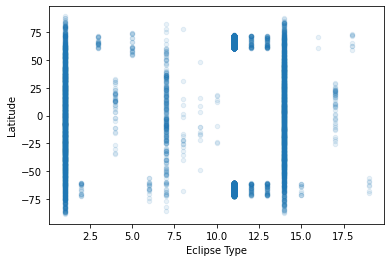

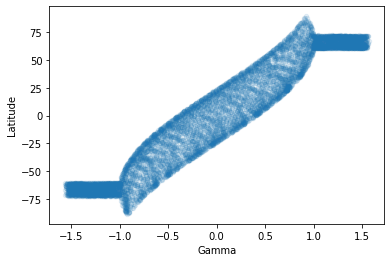

In [91]:
solar.plot(kind = 'scatter', x = 'Saros Number', y = 'Lunation Number', alpha = 0.1)
solar.plot(kind = 'scatter', x = 'Eclipse Type', y = 'Latitude', alpha = 0.1)
solar.plot(kind = 'scatter', x = 'Gamma', y = 'Latitude', alpha = 0.1)